In [171]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Ingestion Pipeline

In [172]:
wait_flag = True
df = pd.read_parquet(f"../py_sim_output_w_{wait_flag}.parquet")
df.head()

,s_val,age_at_ref,ref_epoch,ax_epoch,n_appts,dis_epoch,age_out
0,1,56.685494,0,0.0,7.240000,26,False
1,1,74.652491,1,1.0,7.240000,26,False
2,1,28.507543,0,0.0,7.240000,28,False
3,1,67.373956,0,1.0,7.270038,28,False
4,1,66.310689,0,2.0,7.300077,28,False


Conduct some data processing:
1. Get the tiem from referral to assessment in weeks and years
2. Get ages in years


In [173]:
df['ref_to_ax_yrs'] = (df['ax_epoch'] - df['ref_epoch'])/52
df['age_at_ref_yrs'] = df['age_at_ref']/52
df['age_at_discharge_yrs'] = (df['dis_epoch'] - df['ref_epoch'])/52 + df['age_at_ref_yrs']

Text(0.5, 0, 'Discharge epoch (Week)')

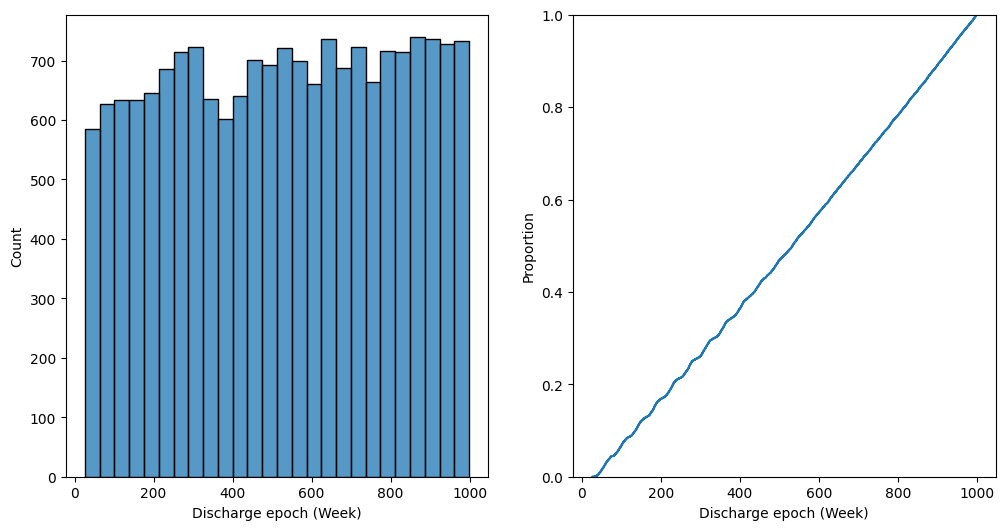

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['dis_epoch'], ax=ax[0])
ax[0].set_xlabel("Discharge epoch (Week)")
sns.ecdfplot(data=df, x='dis_epoch', stat='proportion', ax=ax[1])
ax[1].set_xlabel("Discharge epoch (Week)")

Truncate the data to after the 20th percentile of the discharge epoch (i.e., 'burn-in' the simulation).

In [175]:
df = df.loc[df['dis_epoch'] >= np.percentile(df['dis_epoch'], 20)].copy()

In [176]:
temp = df.age_out.value_counts(normalize=True)
print(f"{temp.loc[False]*100:.3f}% of patients who left the system were discharged for acheiving approporiate outcomes.")
print(f"{temp.loc[True]*100:.3f}% of patients who left the system were discharged for aging-out.")

80.284% of patients who left the system were discharged for acheiving approporiate outcomes.
19.716% of patients who left the system were discharged for aging-out.


In [177]:
df.groupby('s_val', as_index=False).agg({'age_out': lambda x: x.sum()/x.count(),
                                         'age_at_ref_yrs': 'mean',
                                         'age_at_discharge_yrs': 'mean'})

,s_val,age_out,age_at_ref_yrs,age_at_discharge_yrs
0,2,0.289801,1.750769,3.359546
1,3,0.002182,1.750508,2.702998
